# <div style="color: #123a43; background: white; width: 100%; padding: 20px; border-radius: 5px;">Pierre Celestin Niyomugabo - 100883</div>

## Import the packages

In [96]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [97]:
data = pd.read_csv('groceries.csv', low_memory=False, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Drop all unnamed columns with no observations
data = data.dropna(axis=1, how='all')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Convert the DataFrame to a list of transactions (each row is a list)

In [99]:
transactions = data.values.tolist()

# Remove empty entries (e.g., NaN or blank strings)
transactions_clean = [
    [item for item in transaction if isinstance(item, str) and item.strip() != '']
    for transaction in transactions
]

# One-hot encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions_clean).transform(transactions_clean)
basket = pd.DataFrame(te_ary, columns=te.columns_)

# Preview the one-hot encoded transaction matrix
basket.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## 1. Generate frequent itemsets with apriori

In [100]:
# Generate frequent itemsets with minimum support of 2%
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Sort and display top 10 most frequent itemsets
frequent_itemsets.sort_values(by='support', ascending=False).head(10)


,support,itemsets
57,0.255516,(whole milk)
39,0.193493,(other vegetables)
43,0.183935,(rolls/buns)
49,0.174377,(soda)
58,0.139502,(yogurt)
5,0.110524,(bottled water)
44,0.108998,(root vegetables)
53,0.104931,(tropical fruit)
47,0.098526,(shopping bags)
46,0.093950,(sausage)


### Top 10 frequent itemsets

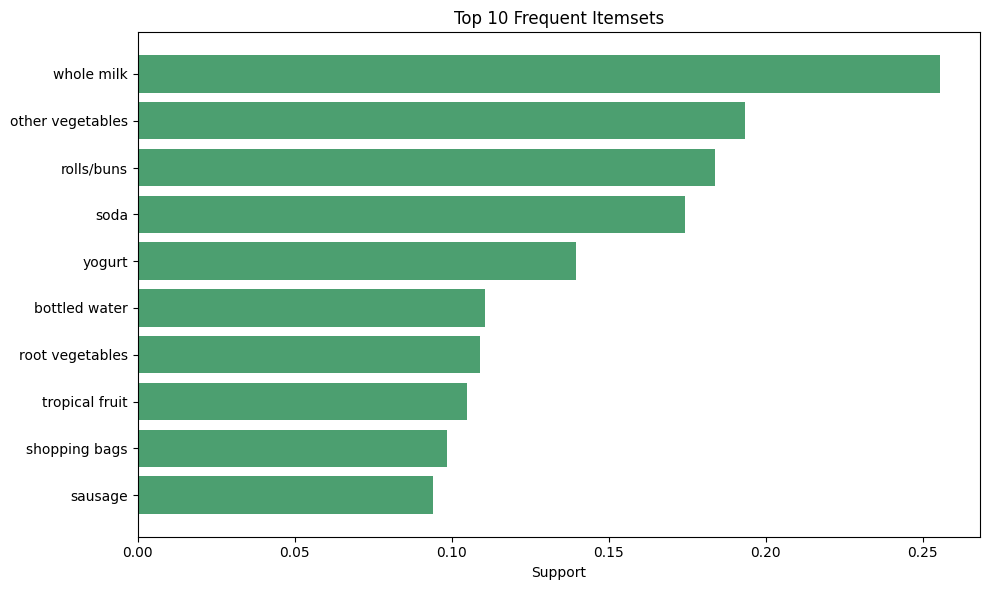

In [101]:
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)

# Convert frozensets to strings for display
top_itemsets['itemset'] = top_itemsets['itemsets'].apply(lambda x: ', '.join(list(x)))

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_itemsets['itemset'], top_itemsets['support'], color='#4C9F70')
plt.xlabel('Support')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 2. Generating association rules

In [102]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Sort by lift (interestingness)
rules = rules.sort_values(by='lift', ascending=False)

# Number of rules
print(f"Number of association rules generated: {len(rules)}")

# Show top 10 rules
rules.head(10)


Number of association rules generated: 37


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
33,"(other vegetables, whole milk)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,1.0,0.015026,1.290900,0.700572,0.144304,0.225347,0.261235
34,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,1.0,0.013719,1.533320,0.622230,0.105751,0.347821,0.296912
17,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,1.0,0.026291,1.426693,0.622764,0.185731,0.299078,0.339789
19,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,1.0,0.015006,1.350565,0.559803,0.122203,0.259569,0.276037
35,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,1.0,0.011427,1.338511,0.543633,0.097987,0.252901,0.256270
36,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,1.0,0.011174,1.528340,0.524577,0.080485,0.345695,0.300014
4,(butter),(whole milk),0.055414,0.255516,0.027555,0.497248,1.946053,1.0,0.013395,1.480817,0.514659,0.097237,0.324697,0.302543
16,(pork),(other vegetables),0.057651,0.193493,0.021657,0.375661,1.941476,1.0,0.010502,1.291779,0.514595,0.094373,0.225874,0.243795
7,(curd),(whole milk),0.053279,0.255516,0.026131,0.490458,1.919481,1.0,0.012517,1.461085,0.505984,0.092446,0.315577,0.296363
32,"(other vegetables, root vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,1.0,0.011076,1.457687,0.501524,0.082879,0.313982,0.289999


A total of 37 association rules were created

In [103]:
rules_df = rules.sort_values(by='lift', ascending=False)
rules_df['rule'] = rules_df.apply(
    lambda row: f"If {', '.join(row['antecedents'])} → then {', '.join(row['consequents'])}", axis=1
)


rules_df.reset_index(drop=True, inplace=True)

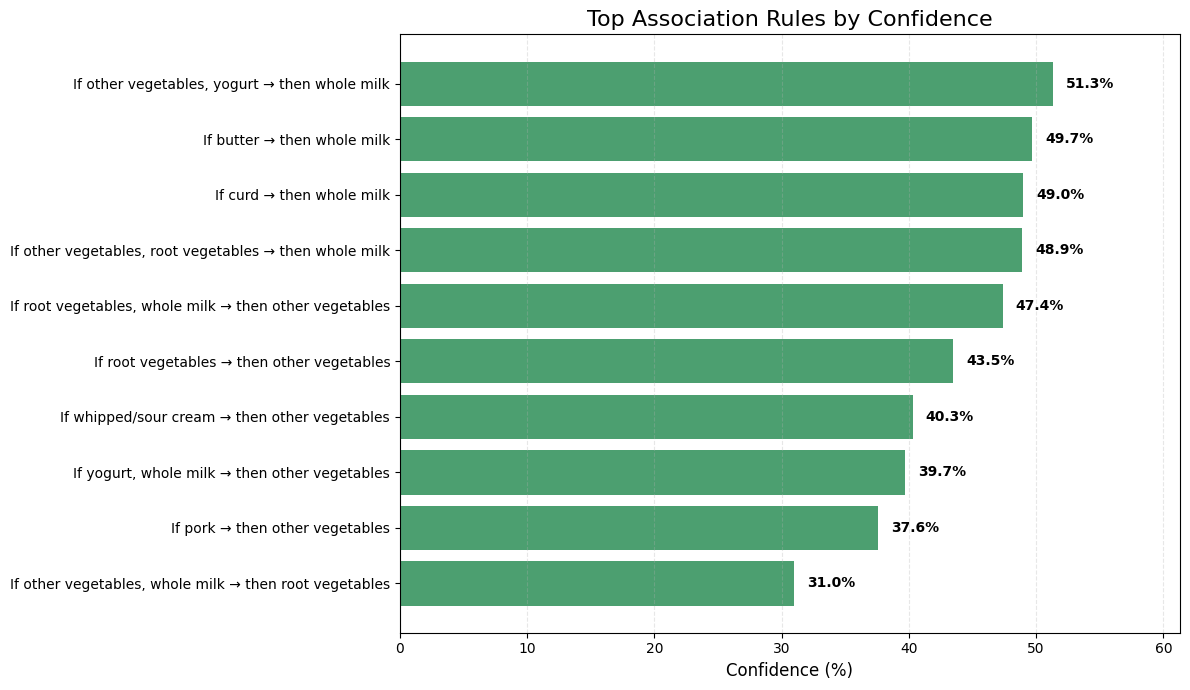

In [104]:

top_rules = rules_df.head(10).copy()

top_rules.sort_values(by='confidence', ascending=False, inplace=True)
top_rules['confidence_pct'] = (top_rules['confidence'] * 100).round(1)

plt.figure(figsize=(12, 7))
bars = plt.barh(top_rules['rule'], top_rules['confidence_pct'], color='#4C9F70')

plt.xlabel('Confidence (%)', fontsize=12)
plt.title('Top Association Rules by Confidence', fontsize=16)
plt.xlim(0, max(top_rules['confidence_pct']) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().invert_yaxis()

# Add confidence % labels next to bars
for bar, conf in zip(bars, top_rules['confidence_pct']):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{conf}%", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Customer behavior

This Market Basket Analysis shows clear and consistent purchasing habits among grocery store customers. The following behavioral patterns emerged:

- Dairy as a core purchase driver: Items like whole milk, yogurt, and butter frequently appear in both individual transactions (support) and rule consequents (confidence). This suggests that dairy items are central to grocery shopping and often purchased with other categories.

- Vegetables are commonly bundled: Products such as other vegetables, root vegetables, and tropical fruits frequently co-occur in the same basket. Customers buying vegetables tend to purchase multiple types together, indicating a preference for fresh meal preparation.

- Meal-prep behavior is visible: Customers buying whole milk and vegetables are highly likely to add root vegetables to their baskets. This shows a trend toward planning for complete meals, especially soup or stew-like dishes.

- Bread and drink as staples: Frequent purchases of rolls/buns, soda, and bottled water suggest a pattern of combining snackable or ready-to-consume items, possibly for lunch or casual home use.



## 4. Recommendations

Based on the insights above, the following business actions are recommended:

1. **Cross-sell dairy with vegetables**  
   Since milk and vegetables frequently co-occur, create bundles like:
   - *"Meal Starter Kit"*: Milk + Vegetables + Root Vegetables  
   - Highlight these bundles in-store and online with recipe suggestions.

2. **Place complementary items nearby**
   - Position *yogurt*, *butter*, and *milk* close to fresh produce sections.  
   - Group *root vegetables* near *whole milk* to encourage natural bundling.

3. **Promotions based on association rules**
   - Offer combo discounts when a customer buys `other vegetables + yogurt`, and suggest adding `whole milk`.
   - Use digital receipts or app suggestions to recommend missing frequent items.

4. **Inventory planning**
   - Ensure high availability of **core items** like milk, vegetables, and bread products, as they are key transaction drivers.  
   - Stock up based on rule lift and support — `whole milk`, `other vegetables`, and `rolls/buns` are high-demand anchors.

5. **Create a "frequently bought together" shelf**
   - Curate shelves based on high-confidence rules: e.g., *“If buying butter, you may want milk.”*
